## Explore tempo features for structure via dimensionality reduction.

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import IPython.display as ipd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import (PCA, KernelPCA)
from sklearn.manifold import (TSNE, Isomap)

import matplotlib.pyplot as plt
import seaborn as sns

import utils

RANDOM_STATE = 53

#### Load features,tracks,tempo

In [10]:
(features, tracks) = utils.load_features()
features.shape, tracks.shape

((106574, 518), (106574, 52))

In [11]:
tempo = utils.load_tempo('small')
tempo.shape

(8000, 7)

#### Merge FMA features and with new tempo features

Note: tempo has a few tracks with NA (bad mp3s)

In [12]:
small = tracks['set', 'subset'] == 'small'

Y = tracks[small][('track','genre_top')]

tempo = tempo.dropna()
df = features[small]
df = df.merge(tempo, on='track_id')

Y = Y[Y.index.isin(df.index)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 2 to 155066
Columns: 525 entries, ('chroma_cens', 'kurtosis', '01') to ('tempo', 'max', '01')
dtypes: float64(525)
memory usage: 32.1 MB


#### Run some dimensionality reduction on tempo (default hyperparameters

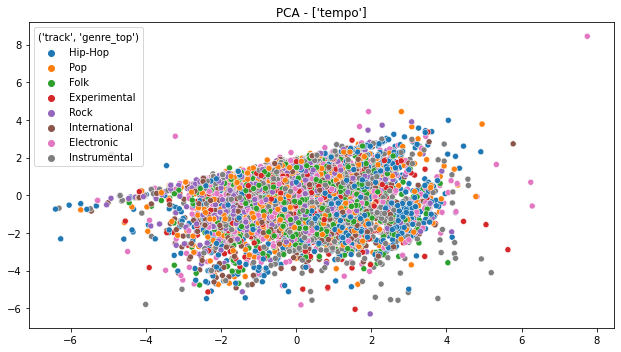

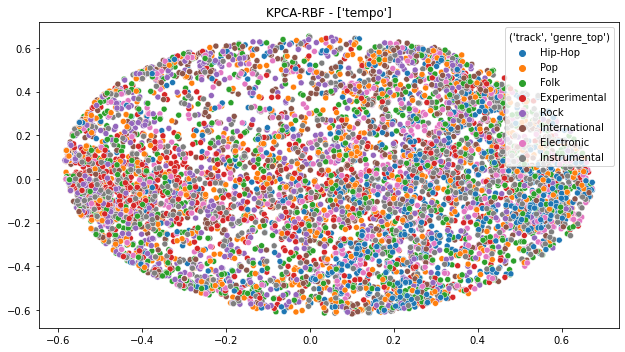

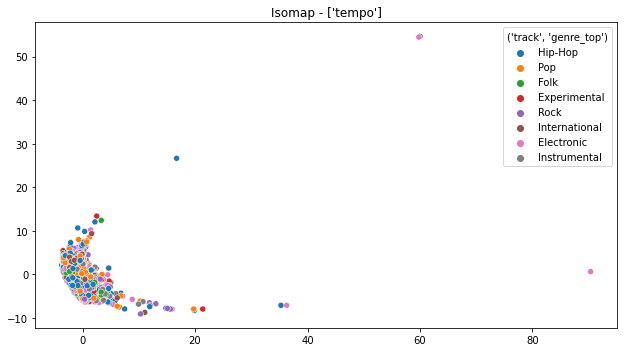

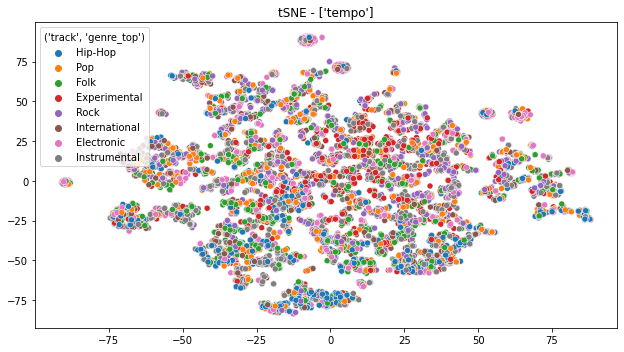

In [13]:
estimators = {'PCA': PCA(n_components=2, random_state=RANDOM_STATE),
              'KPCA-RBF':  KernelPCA(n_components=2, kernel='rbf', random_state=RANDOM_STATE, n_jobs=-1),
              'Isomap':  Isomap(n_components=2, n_jobs=-1),
              'tSNE': TSNE(n_components=2, random_state=RANDOM_STATE, n_jobs=-1)
             }

for (name, estimator) in estimators.items():
    utils.estimate_features(df, Y, [['tempo']], name, estimator)

#### Rerun with some different hyperparameters

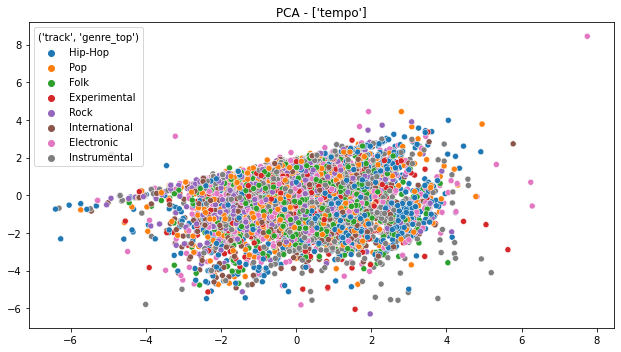

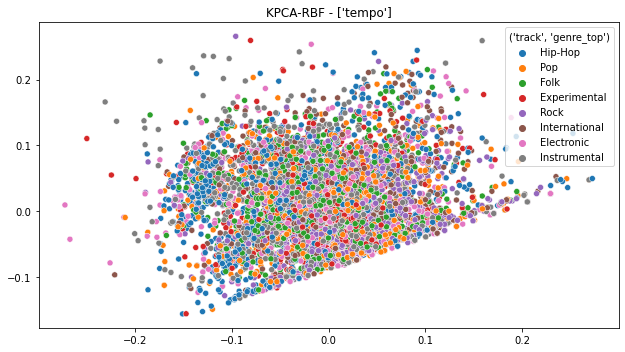

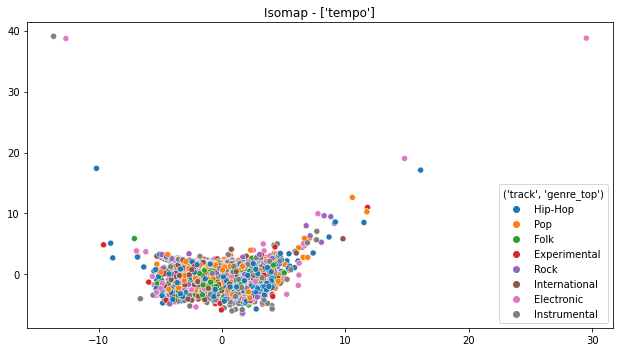

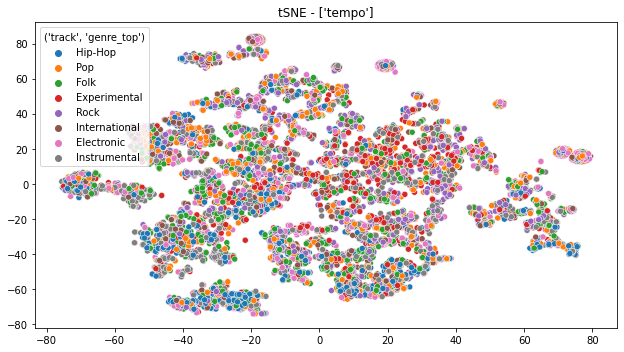

In [14]:
estimators = {'PCA': PCA(n_components=2, random_state=RANDOM_STATE),
              'KPCA-RBF':  KernelPCA(n_components=2, kernel='rbf', gamma=.001, random_state=RANDOM_STATE, n_jobs=-1),
              'Isomap':  Isomap(n_components=2, n_neighbors=25,  n_jobs=-1),
              'tSNE': TSNE(n_components=2, perplexity=50, n_iter=2000, random_state=RANDOM_STATE, n_jobs=-1)
             }

for (name, estimator) in estimators.items():
    utils.estimate_features(df, Y, [['tempo']], name, estimator)


C:\Users\orovi\Google Drive\projects\udel\math637\project\notebooks\utils.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(17,5*nrows))


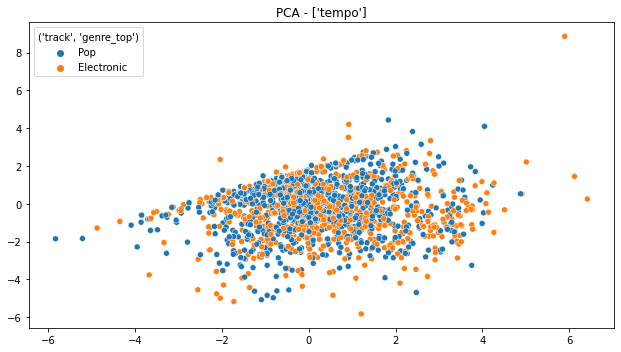

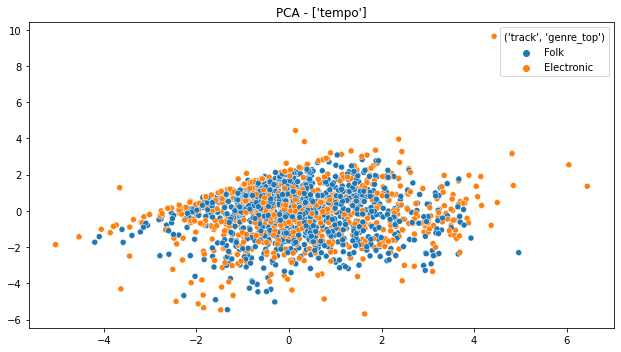

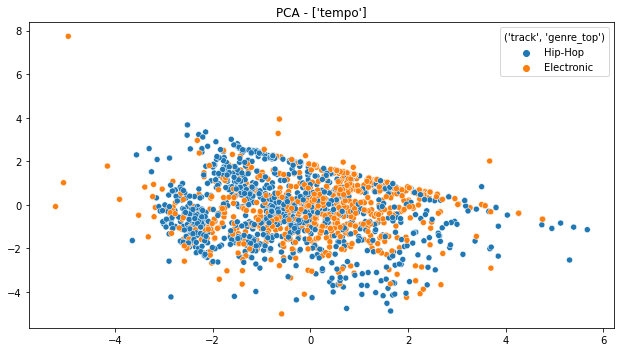

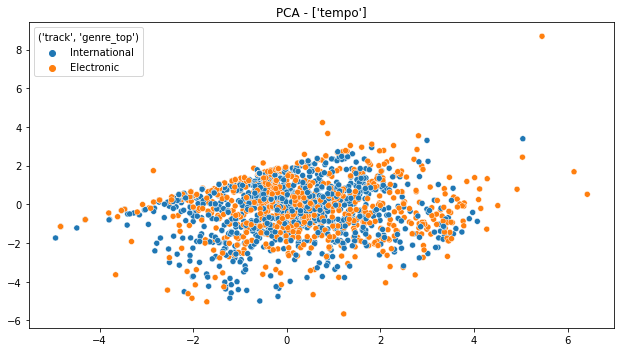

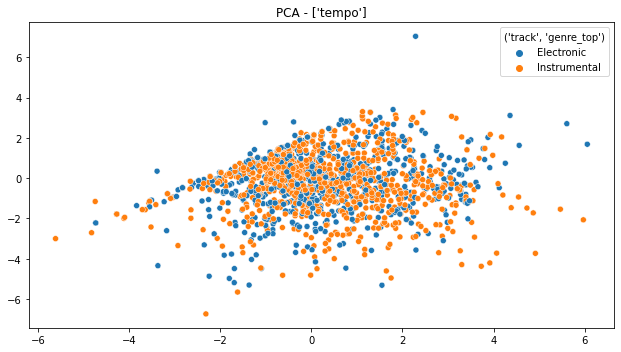

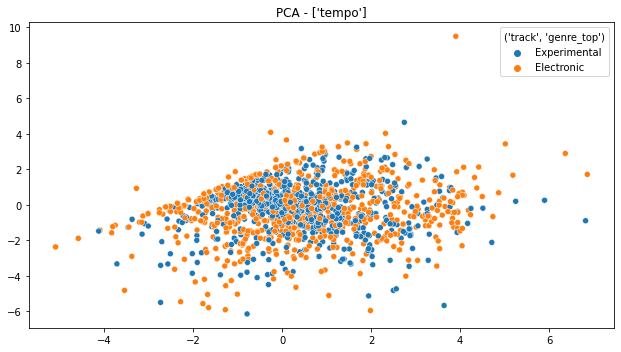

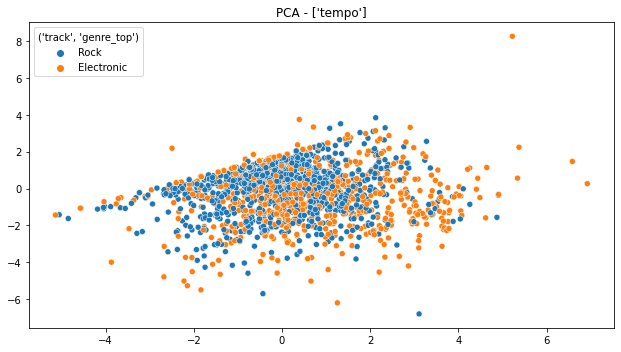

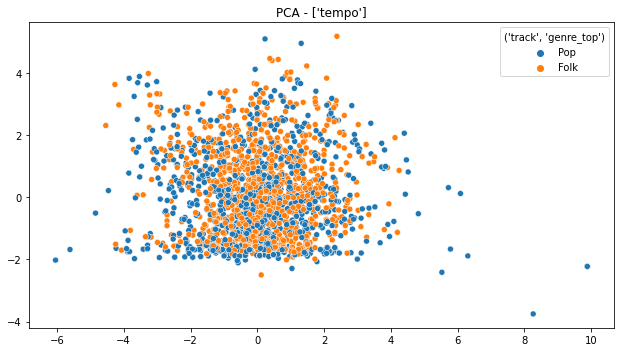

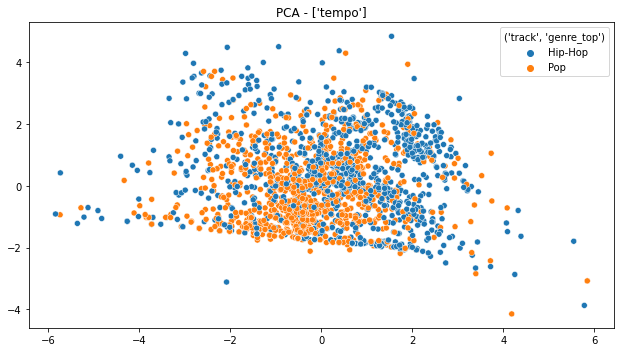

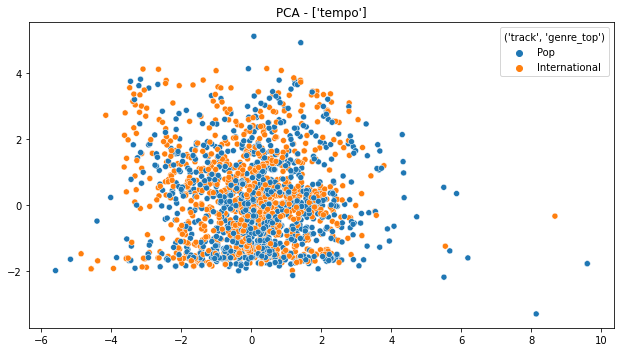

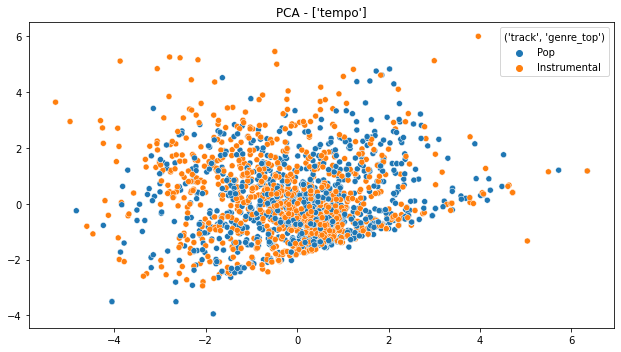

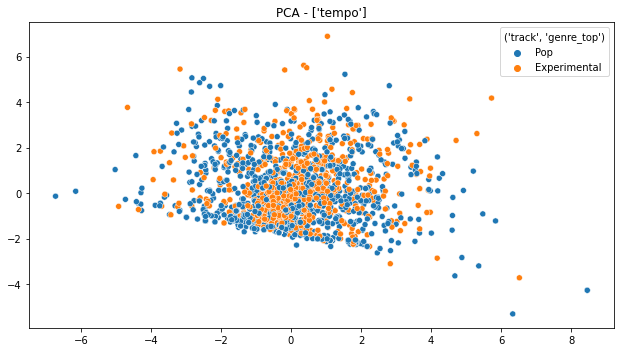

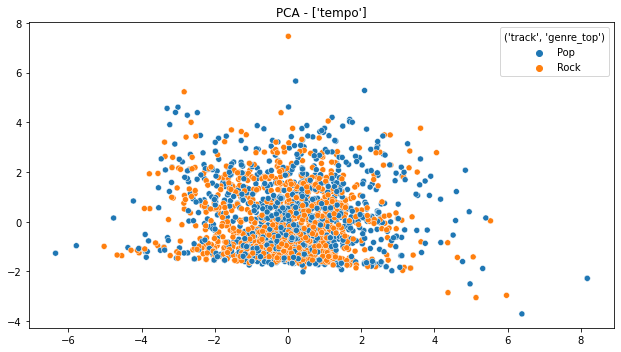

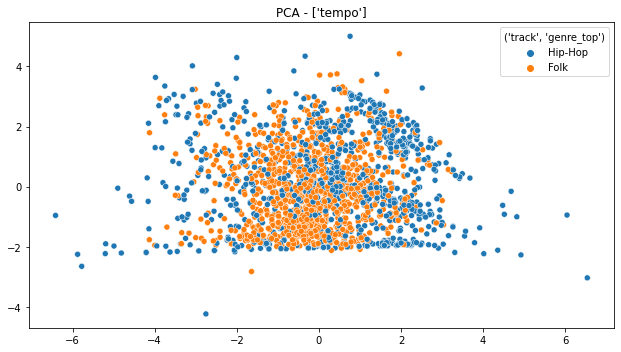

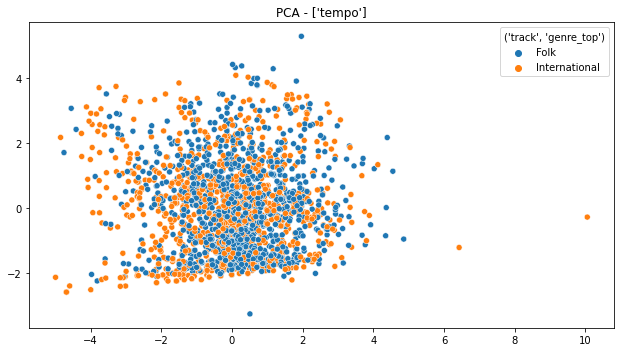

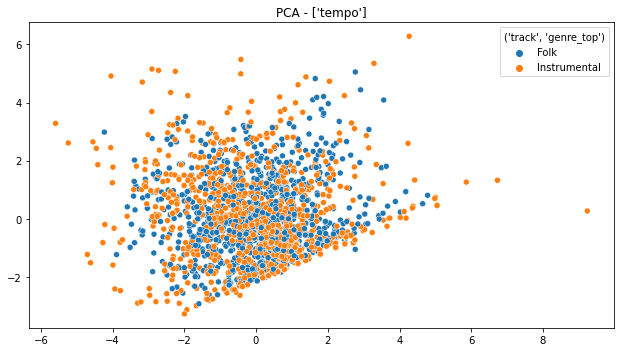

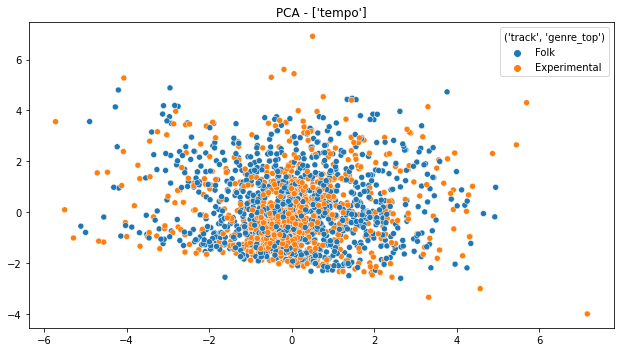

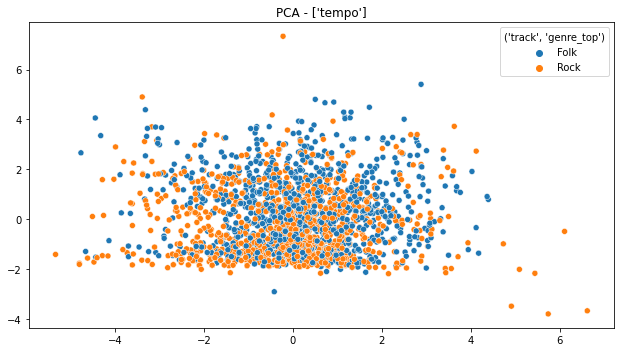

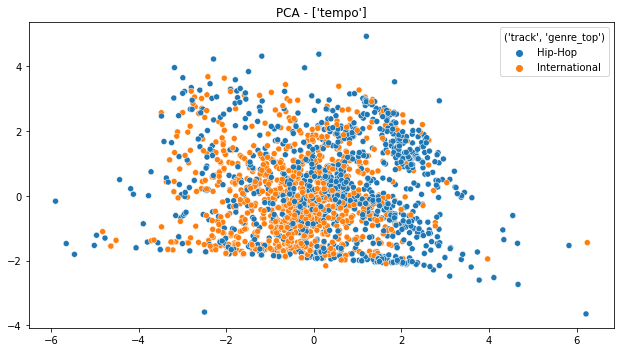

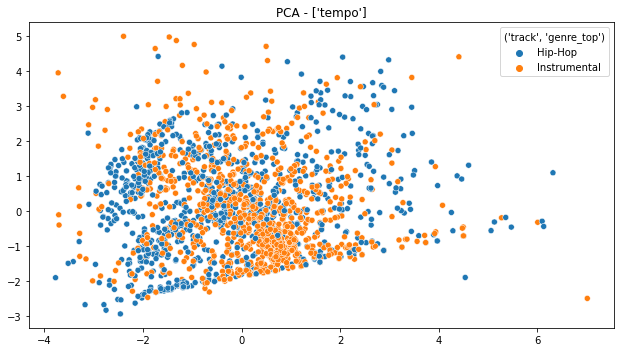

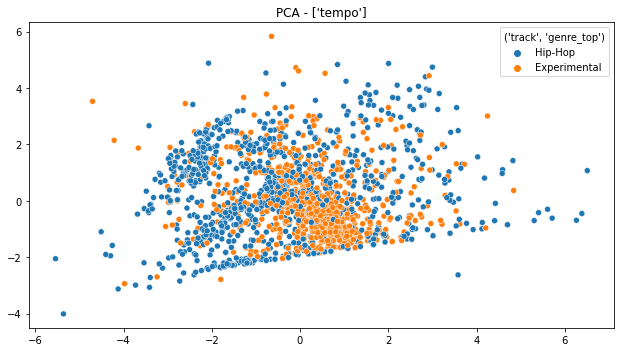

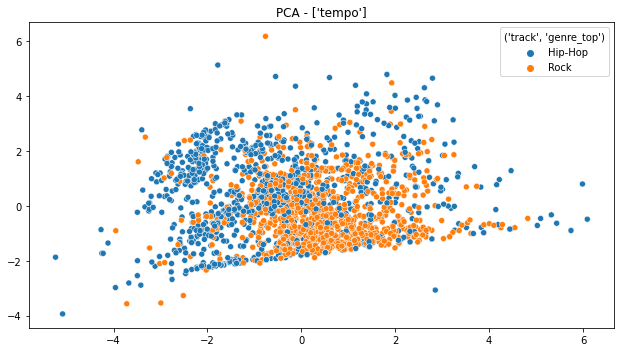

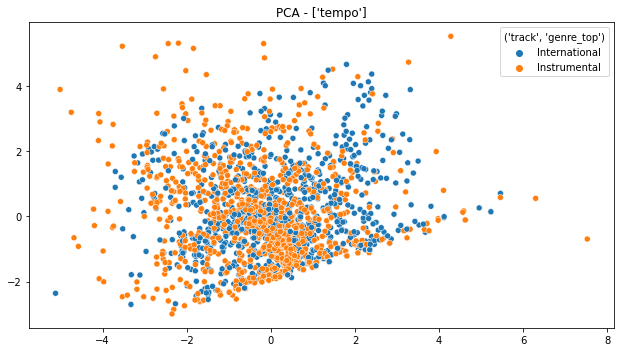

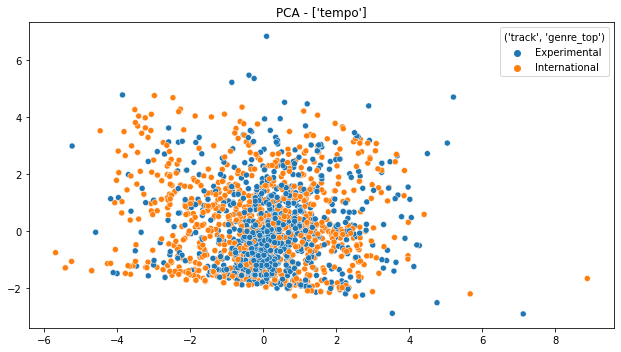

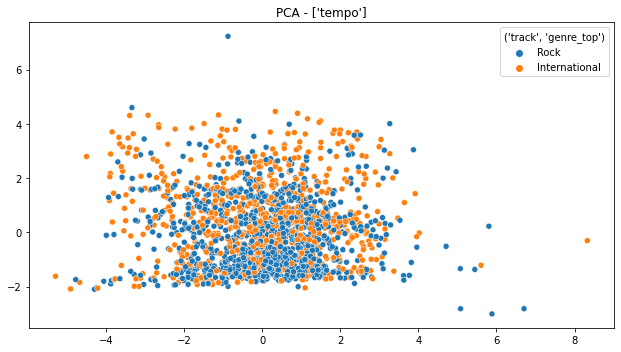

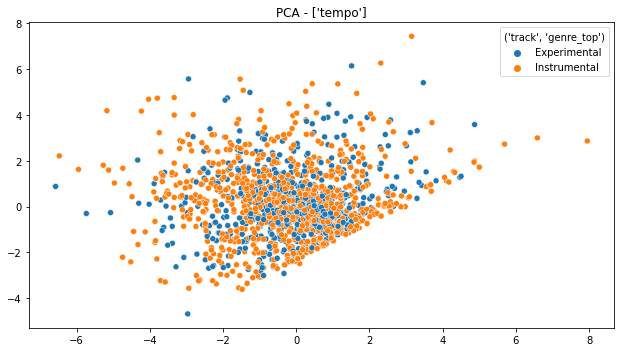

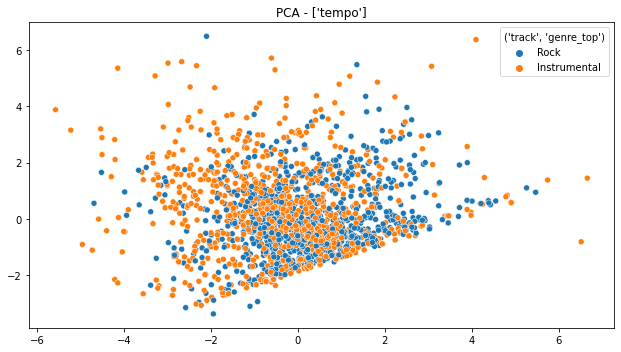

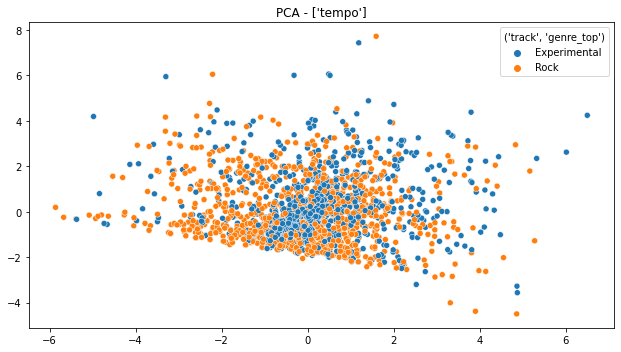

In [15]:
import itertools 

genre_tops = tracks[small][('track','genre_top')].value_counts().index.values
genre_pairs = list(itertools.combinations(genre_tops, 2))

feature_sets =  [['tempo']]
                 
for genre_pair in genre_pairs:
    subset = Y.isin(genre_pair)
    Y1 = Y[subset]
    df1 = df[subset]
    utils.estimate_features(df1, Y1, feature_sets, 'PCA', PCA(n_components=2))


C:\Users\orovi\Google Drive\projects\udel\math637\project\notebooks\utils.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(17,5*nrows))


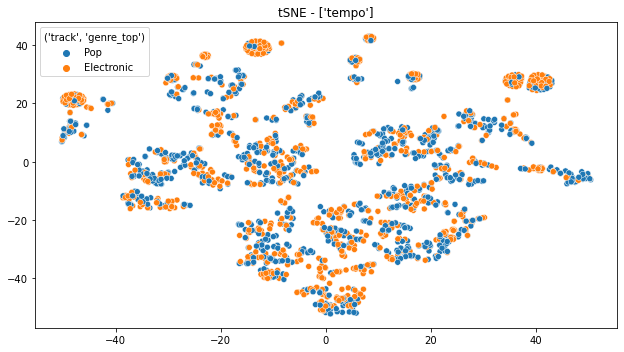

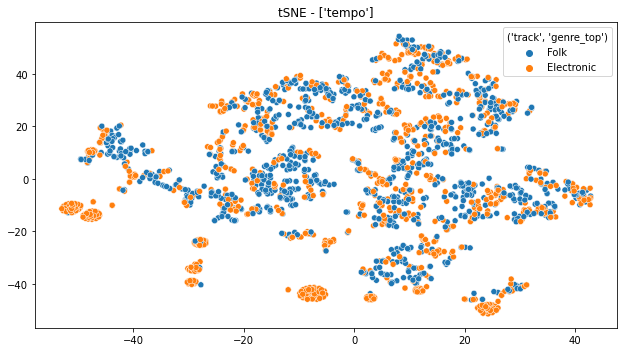

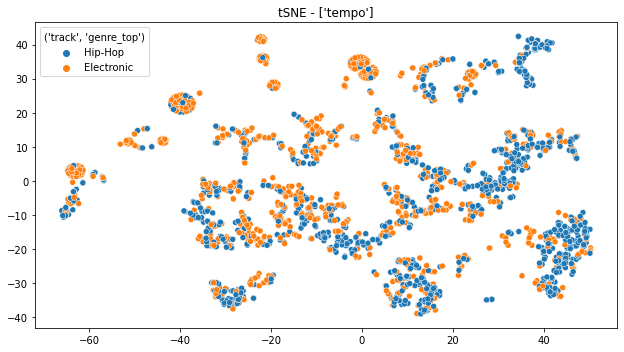

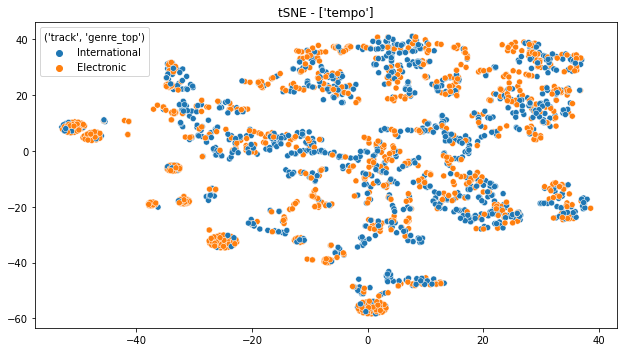

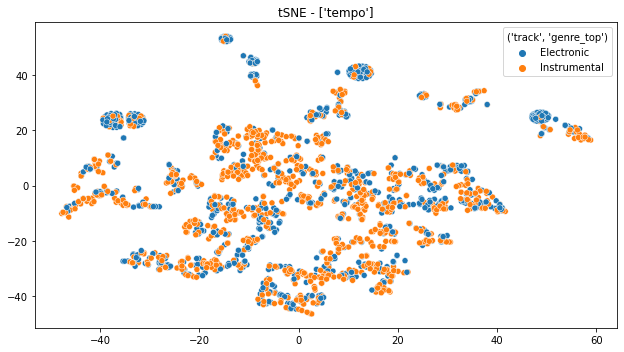

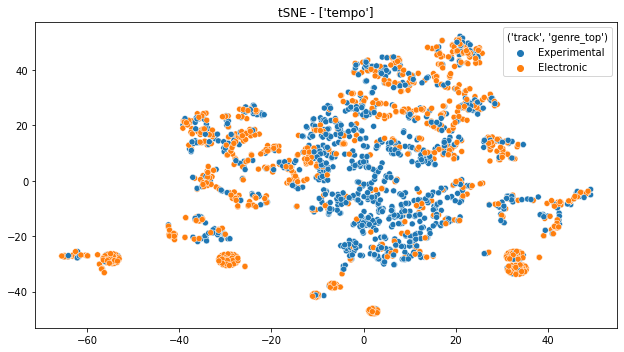

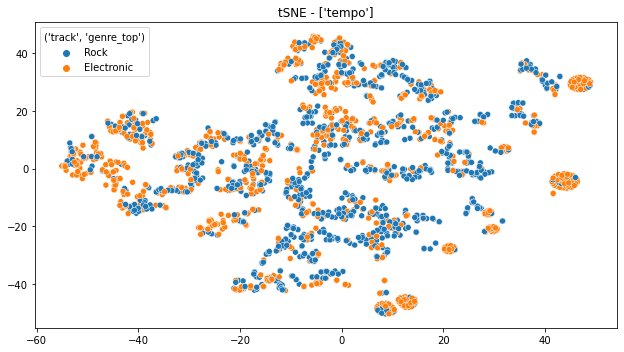

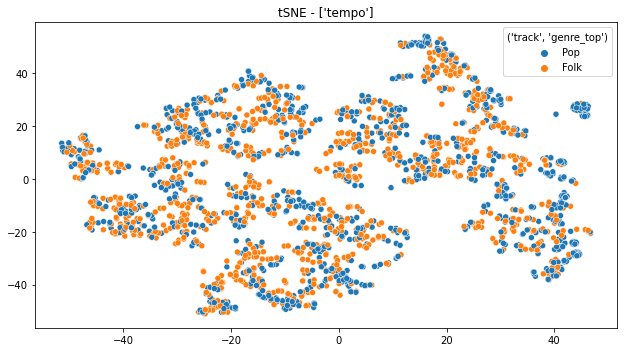

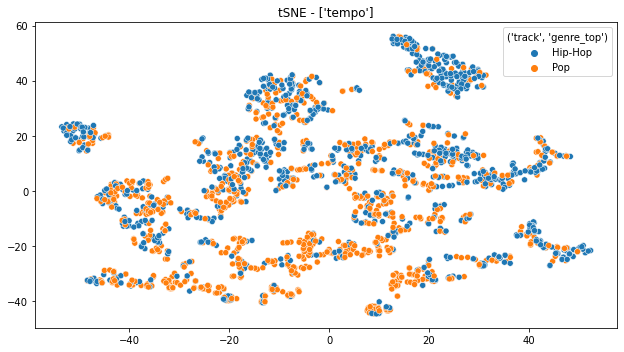

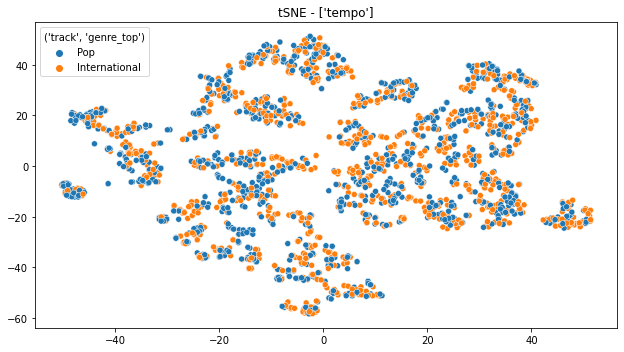

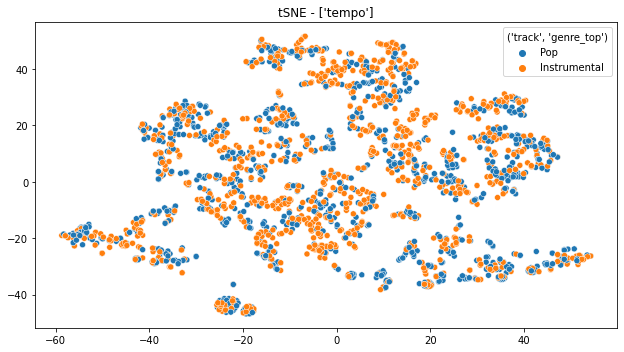

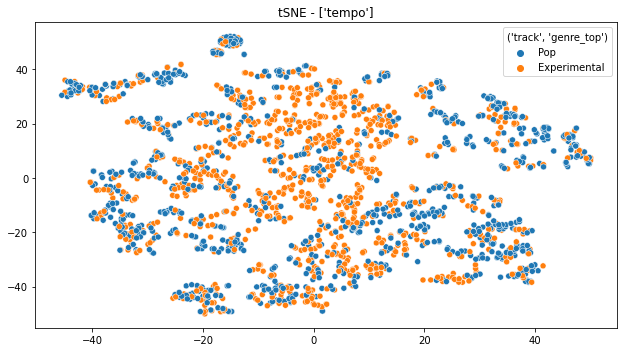

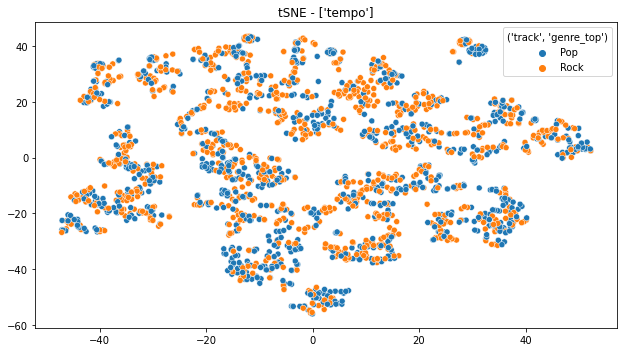

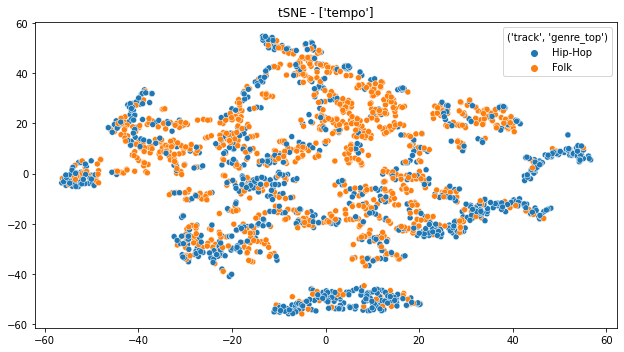

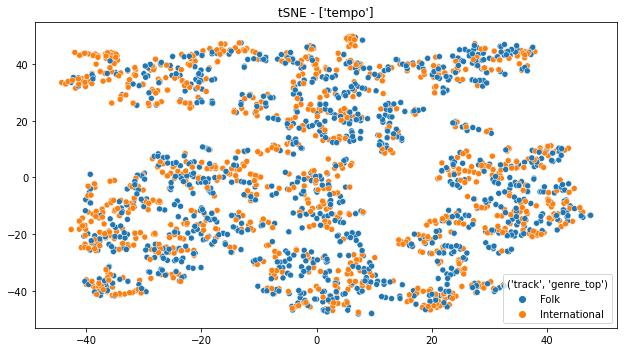

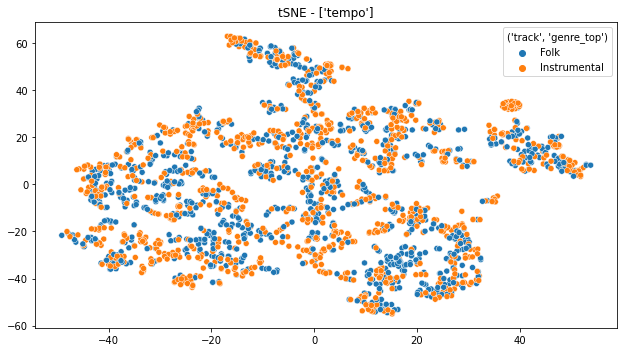

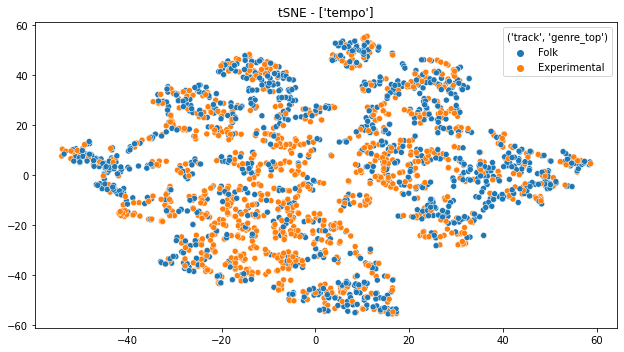

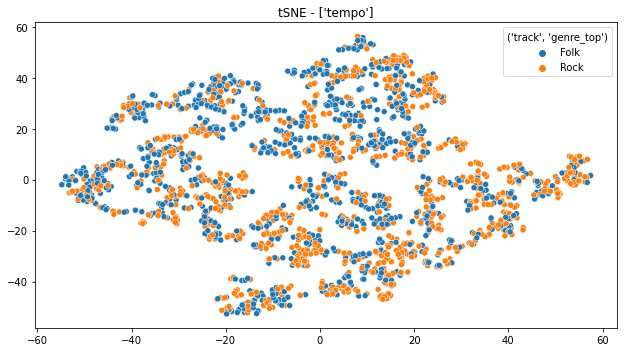

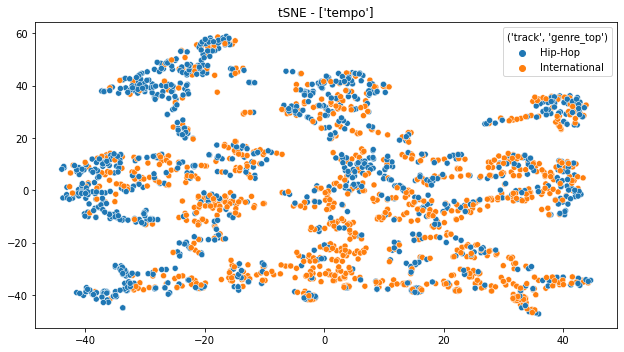

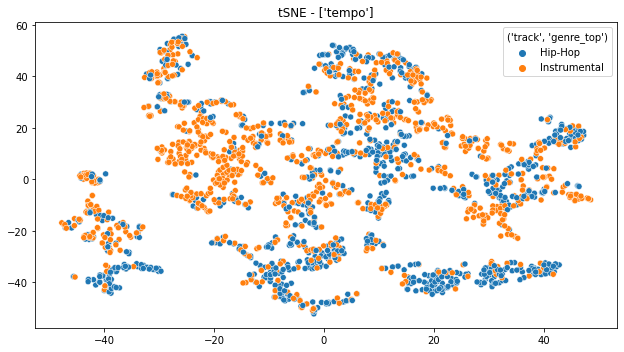

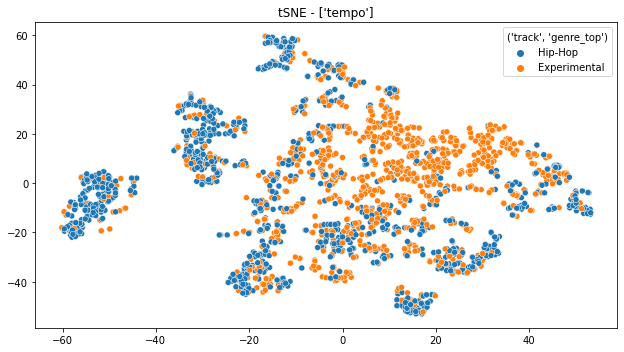

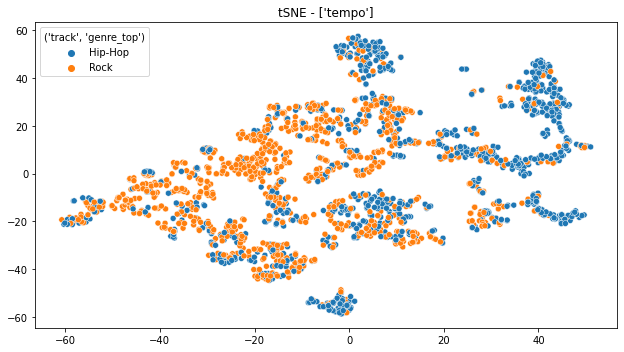

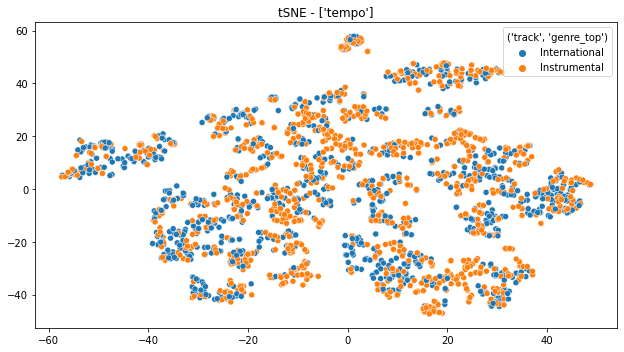

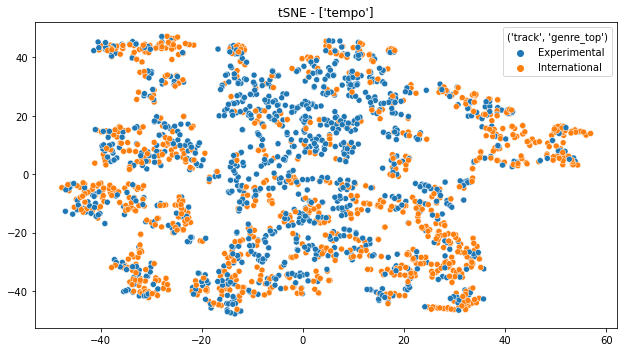

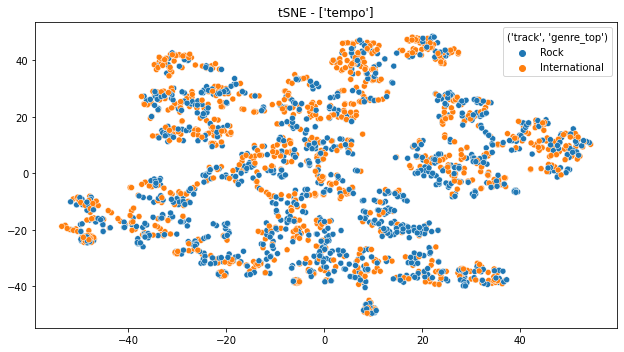

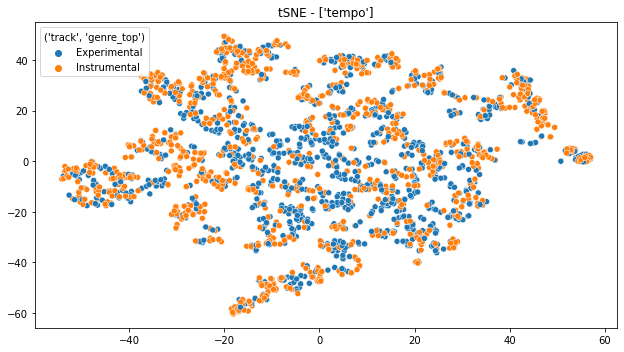

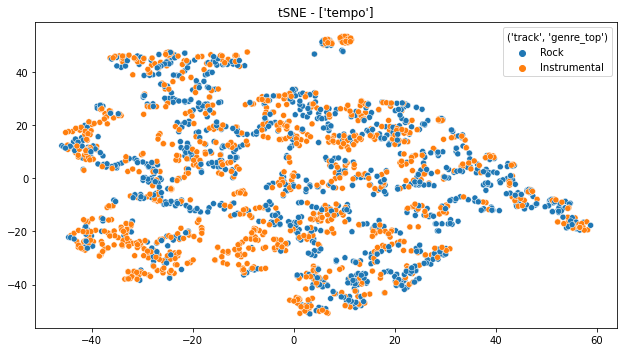

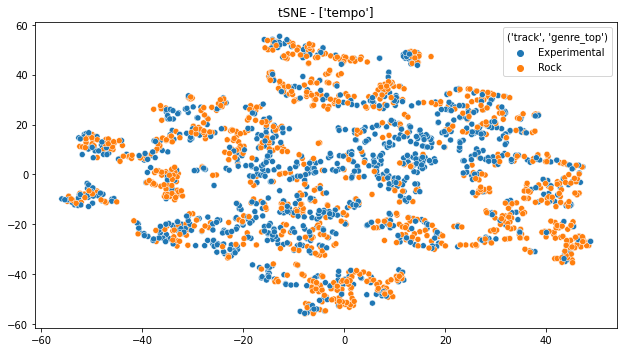

In [16]:
for genre_pair in genre_pairs:
    subset = Y.isin(genre_pair)
    Y1 = Y[subset]
    df1 = df[subset]
    utils.estimate_features(df1, Y1, feature_sets, 'tSNE', TSNE(n_components=2, n_jobs=-1))

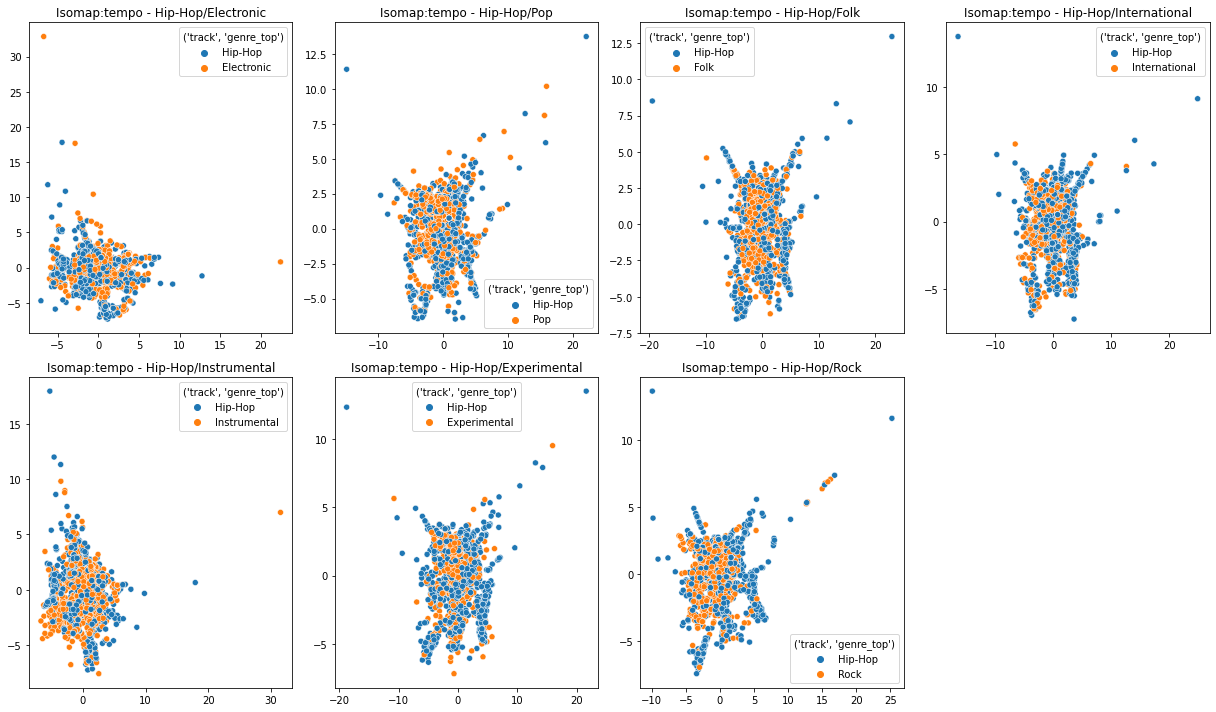

In [18]:
def run_estimator_genre_pairs(df, Y, genre1, genres, estimator):
    n_cols = 4
    genres = np.delete(genres, np.where(genres == genre1))
    n_rows = (len(genres)+2)//n_cols
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(17,5*n_rows))
    for genre2,ax in zip(genres, axs.flat):
        g_pair = [genre1, genre2]
        subset = Y.isin(g_pair)
        Y_pairs = Y[subset]
        df_pairs = df[subset]
        
        utils.run_estimator(df_pairs, Y_pairs, estimator, ax)
        ax.set_title(f'Isomap:tempo - {genre1}/{genre2}')
        
    last_row_count = n_cols - (n_rows*n_cols - len(genres))
    if (last_row_count < n_cols):
        for to_del in range(last_row_count, n_cols):
            fig.delaxes(axs[n_rows-1,to_del])

    plt.tight_layout()
    plt.show()
 
genre_tops = tracks[small][('track','genre_top')].value_counts().index.values

run_estimator_genre_pairs(df['tempo'], Y, 'Hip-Hop', genre_tops, Isomap(n_components=2, n_jobs=-1))